Deep Learning - Python

In [3]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

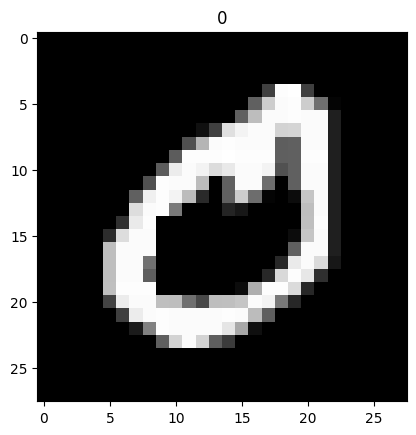

In [4]:
#Obtenção dos dados e divisão automática entre treinamento e teste
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()
#Visualização de imagens específicas
plt.imshow(x_treinamento[21], cmap='gray')
plt.title(y_treinamento[21])

In [5]:
#Mudança de dimensão, originalmente está em 28x28 e precisamos 784
x_treinamento = x_treinamento.reshape((len(x_treinamento), np.prod(x_treinamento.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
#Transformação dos dados para float para podermos normalizar os dados
x_treinamento = x_treinamento.astype('float32')
x_teste = x_teste.astype('float32')

In [7]:
#Normalização (255 é o valor máximo de um pixel)
x_treinamento /= 255
x_teste /= 255

In [8]:
#Transformação para o formato dummy (temos 10 classes)
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [9]:
#Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
#Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#Camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

c:\Users\ouropreto\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,632 (693.88 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 118,422 (462.59 KB)

In [10]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(x_treinamento, y_treinamento, epochs = 20,
                       validation_data = (x_teste, y_teste))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7653 - loss: 0.7293 - val_accuracy: 0.9504 - val_loss: 0.1652
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9296 - loss: 0.2410 - val_accuracy: 0.9602 - val_loss: 0.1353
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9461 - loss: 0.1923 - val_accuracy: 0.9660 - val_loss: 0.1175
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9504 - loss: 0.1708 - val_accuracy: 0.9690 - val_loss: 0.1103
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9562 - loss: 0.1506 - val_accuracy: 0.9705 - val_loss: 0.1079
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9598 - loss: 0.1359 - val_accuracy: 0.9726 - val_loss: 0.1003
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9612 - loss: 0.1302 - val_accuracy: 0.9724 - val_loss: 0.0966
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9651 - loss: 0.1183 - 

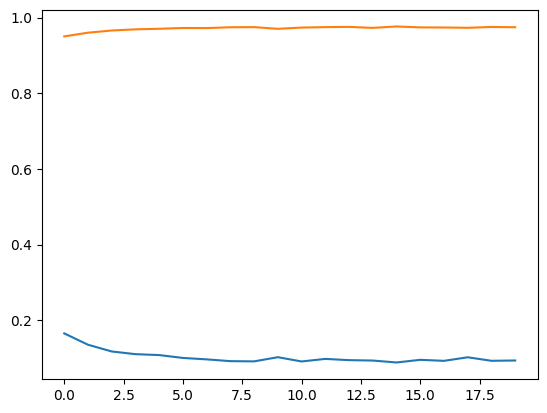

In [12]:
#Gráfico para visualizar os erros e accuracy
historico.history.keys()
#Evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [13]:
#obtenção das previsões
previsoes = modelo.predict(x_teste)
previsoes

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.00299824e-10, 7.75871278e-09, 1.98258276e-05, ...,
        9.99943256e-01, 4.66905958e-10, 2.45969568e-05],
       [9.56513868e-10, 4.01744968e-04, 9.99425173e-01, ...,
        6.76359878e-06, 7.13240934e-06, 9.26883459e-10],
       [2.27152533e-10, 9.99957204e-01, 4.00912722e-06, ...,
        2.14481715e-05, 1.50317846e-05, 5.07393061e-08],
       ...,
       [2.79281789e-11, 1.52105287e-10, 2.92056193e-08, ...,
        1.31228461e-07, 2.54380267e-10, 8.90473927e-07],
       [4.69138845e-19, 7.66968572e-11, 5.73935051e-13, ...,
        6.50866681e-15, 2.09180687e-10, 1.53790995e-14],
       [2.92321500e-10, 8.38750659e-15, 1.33164985e-12, ...,
        2.58286733e-19, 1.20852601e-12, 2.06461909e-14]], dtype=float32)

In [14]:
#valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 969,    0,    1,    0,    1,    0,    4,    1,    4,    0],
       [   0, 1118,    4,    1,    0,    0,    2,    1,    9,    0],
       [   1,    2, 1012,    1,    2,    1,    1,    4,    7,    1],
       [   0,    0,    8,  978,    0,   12,    0,    7,    3,    2],
       [   1,    0,    6,    0,  964,    0,    4,    1,    2,    4],
       [   2,    1,    0,    5,    1,  863,    8,    2,    6,    4],
       [   6,    2,    1,    0,    3,    7,  935,    0,    4,    0],
       [   0,    5,   11,    4,    3,    0,    0,  997,    2,    6],
       [   4,    1,    3,    5,    6,    4,    2,    2,  944,    3],
       [   2,    3,    0,    5,   17,    1,    1,   10,    4,  966]],
      dtype=int64)

In [15]:
#Previsão com um novo registro, convertendo o array para o formato de matriz - número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [16]:
#Passando a mesma posição para o modelo prever
novo = x_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis=0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[4]